In [1]:
### import statements

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t
from scipy.stats import norm

In [4]:
### digitizer efficiency calibration

In [822]:
fn = "MUOLab/MUO temp filtered pulse data digitizer efficiency.txt"
df = pd.read_csv(fn, skiprows=3, delimiter="\t")
df.columns

Index(['Ch0_time1 (s)', 'Ch0_amp1 (V)', 'Ch0_width1 (s)', 'Ch0_time2 (s)',
       'Ch0_amp2 (V)', 'Ch0_width2 (s)', 'Ch1_time1 (s)', 'Ch1_amp1 (V)',
       'Ch1_width1 (s)', 'Ch1_time2 (s)', 'Ch1_amp2 (V)', 'Ch1_width2 (s)'],
      dtype='object')

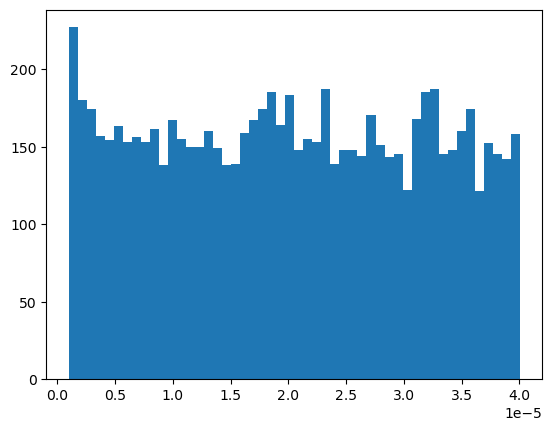

In [823]:
data = df["Ch0_time2 (s)"] - df["Ch0_time1 (s)"]
_ = plt.hist(data, bins=50)

In [825]:
np.mean(_[0])

np.float64(157.88)

<ErrorbarContainer object of 3 artists>

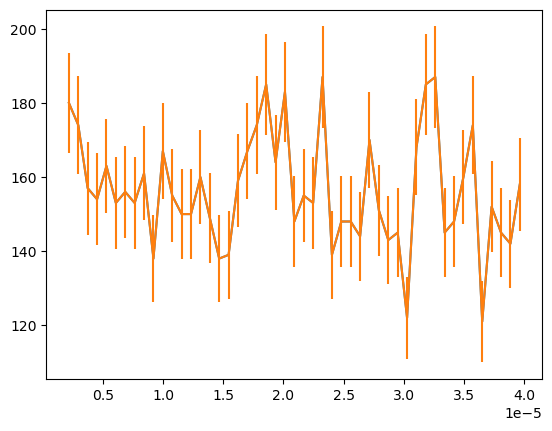

In [75]:
counts = _[0]
binc = (_[1][1:]  + _[1][:-1])/2

# CUTS
binc = binc[1:]
counts = counts[1:]

# PLOT
plt.plot(binc, counts)
plt.errorbar(binc, counts, np.sqrt(counts))

Text(0, 0.5, 'Normalized histogram')

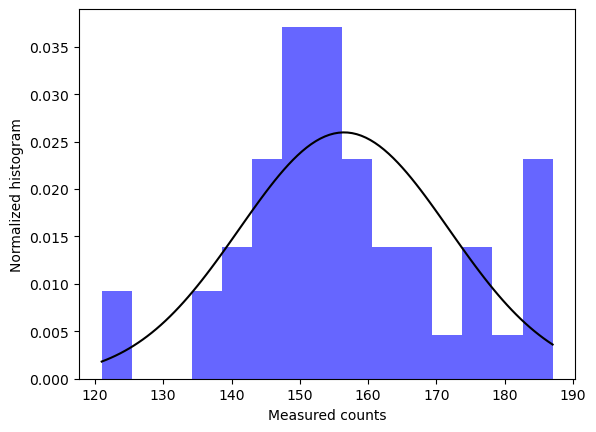

In [102]:
mu, sigma = norm.fit(counts)
x = np.linspace(min(counts), max(counts), 100)
pdf = norm.pdf(x, mu, sigma)
plt.hist(counts, bins=15, density=True, alpha=0.6, color='b', label="Data Histogram")
plt.plot(x, pdf, 'k-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.xlabel("Measured counts")
plt.ylabel("Normalized histogram")

In [83]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, binc, counts, sigma=np.sqrt(counts))
perr = np.sqrt(np.diag(pcov))

In [84]:
perr, popt

(array([1.98034611e+05, 4.72013701e+00]),
 array([-2.73022533e+05,  1.60727561e+02]))

Text(0, 0.5, 'Counts')

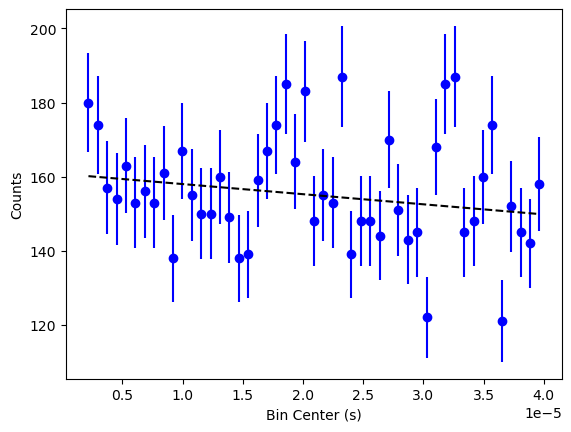

In [88]:
plt.scatter(binc, counts, color='blue', label='Data')
plt.errorbar(binc, counts, np.sqrt(counts), color='blue', linestyle="")
plt.plot(binc, linear(binc, *popt), 'k--', label='Best Fit Line')
plt.xlabel("Bin Center (s)")
plt.ylabel("Counts")

In [91]:
t_stat = popt[0] / perr[0]
dof = len(counts) - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df=dof))
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The slope is significantly different from zero.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the slope differs from zero.")

Fail to reject the null hypothesis: No significant evidence that the slope differs from zero.


In [103]:
### Calibration 3: digitizer clock dispersion

In [158]:
fn = "MUOLab/debug 20us cal 4 2.txt"
df = pd.read_csv(fn, skiprows=3, delimiter="\t")
df.columns

Index(['Ch0_time1 (s)', 'Ch0_amp1 (V)', 'Ch0_width1 (s)', 'Ch0_time2 (s)',
       'Ch0_amp2 (V)', 'Ch0_width2 (s)', 'Ch1_time1 (s)', 'Ch1_amp1 (V)',
       'Ch1_width1 (s)', 'Ch1_time2 (s)', 'Ch1_amp2 (V)', 'Ch1_width2 (s)'],
      dtype='object')

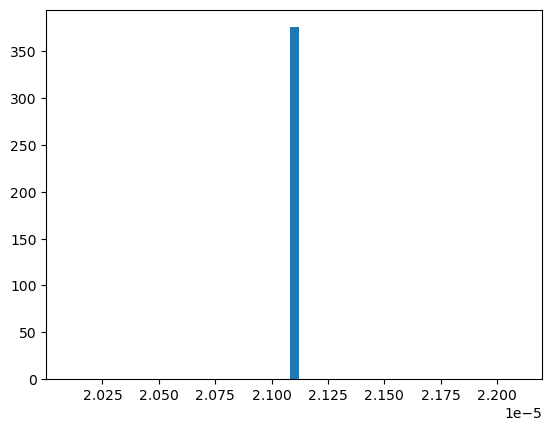

In [181]:
data = df["Ch0_time2 (s)"] - df["Ch0_time1 (s)"]
# data = data.iloc[np.where(data< 3e-5)]
_ = plt.hist(data, bins=np.linspace(np.mean(data) - 1e-6, np.mean(data) + 1e-6))
counts = _[0]
binc = (_[1][1:]  + _[1][:-1])/2

In [185]:
np.std(data)

1.7320508075686696e-09

In [180]:
np.linspace(np.mean(data) - 1e-6, np.mean(data) + 1e-6), np.mean(data)

(array([2.01010000e-05, 2.01418163e-05, 2.01826327e-05, 2.02234490e-05,
        2.02642653e-05, 2.03050816e-05, 2.03458980e-05, 2.03867143e-05,
        2.04275306e-05, 2.04683469e-05, 2.05091633e-05, 2.05499796e-05,
        2.05907959e-05, 2.06316122e-05, 2.06724286e-05, 2.07132449e-05,
        2.07540612e-05, 2.07948776e-05, 2.08356939e-05, 2.08765102e-05,
        2.09173265e-05, 2.09581429e-05, 2.09989592e-05, 2.10397755e-05,
        2.10805918e-05, 2.11214082e-05, 2.11622245e-05, 2.12030408e-05,
        2.12438571e-05, 2.12846735e-05, 2.13254898e-05, 2.13663061e-05,
        2.14071224e-05, 2.14479388e-05, 2.14887551e-05, 2.15295714e-05,
        2.15703878e-05, 2.16112041e-05, 2.16520204e-05, 2.16928367e-05,
        2.17336531e-05, 2.17744694e-05, 2.18152857e-05, 2.18561020e-05,
        2.18969184e-05, 2.19377347e-05, 2.19785510e-05, 2.20193673e-05,
        2.20601837e-05, 2.21010000e-05]),
 np.float64(2.1100999999999997e-05))

Text(0, 0.5, 'Normalized histogram')

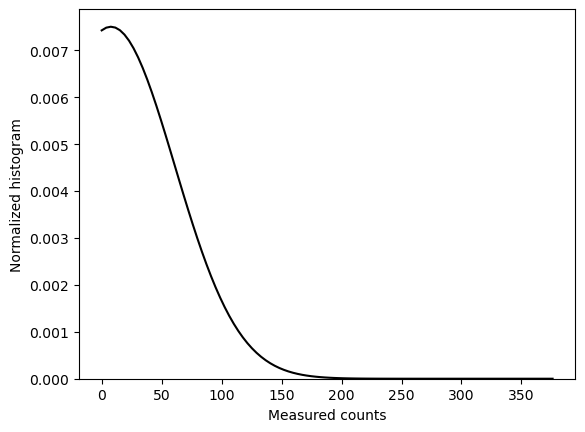

In [184]:
mu, sigma = norm.fit(counts)
x = np.linspace(min(counts), max(counts), 100)
pdf = norm.pdf(x, mu, sigma)
plt.hist(counts, bins=np.linspace(np.mean(data) - 1e-6, np.mean(data) + 1e-6), density=True, alpha=0.6, color='b', label="Data Histogram")
plt.plot(x, pdf, 'k-', label=f'Gaussian Fit\nμ={mu:.2f}, σ={sigma:.2f}')
plt.xlabel("Measured counts")
plt.ylabel("Normalized histogram")

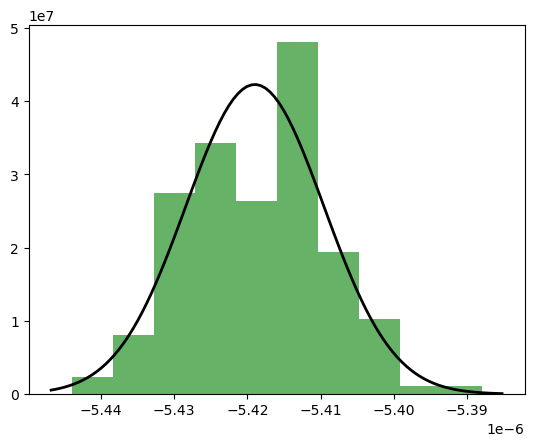

In [138]:
count, bins, ignored = plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Fit a Gaussian distribution to the data
mu, std = norm.fit(data)

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Display
plt.show()

In [139]:
mu, std

(np.float64(-5.418974358974358e-06), np.float64(9.433946286565592e-09))

In [497]:
# calib_3 = {}
# calib_3["1us"] = {}
# calib_3["1us"]["1 V"] = {} # what did we vary? AB
# calib_3["1us"]["1 V"]["fn"] = "debug 1us cal 3.txt"
# calib_3["1us"]["2 V"]["fn"] = "debug 1us cal 4 2.txt"

In [189]:
timebase = [1, 20, 30]
amp = ["1", "1.5", "2"]
fn = f"MUOLab/debug {timebase[1]}us cal 4 {amp[1]}.txt"

In [219]:
calib_timebase = {}
for dt in timebase:
    calib_timebase[dt] = {}
    for a in amp:
        try:        
            fn = f"MUOLab/debug {dt}us cal 4 {a}.txt"
            df = pd.read_csv(fn, skiprows=3, delimiter="\t")
            data = df["Ch0_time2 (s)"] - df["Ch0_time1 (s)"]
            calib_timebase[dt][a] = {}
            calib_timebase[dt][a]["mu"] = np.mean(data)
            calib_timebase[dt][a]["std"] = np.std(data)
            print(f"timebase={dt}, amp={a}, mu={np.mean(data)}, std={np.std(data)}")
        except KeyError as e:
            
            continue


timebase=1, amp=1, mu=2.1000640000000003e-06, std=5.019003885234967e-10
timebase=1, amp=1.5, mu=2.1007950310559014e-06, std=1.596261207871821e-09
timebase=1, amp=2, mu=2.100821752265861e-06, std=1.6160854794833067e-09
timebase=20, amp=1.5, mu=2.1100954732510292e-05, std=1.7051146222325653e-09
timebase=20, amp=2, mu=2.1100999999999997e-05, std=1.7320508075686696e-09
timebase=30, amp=1, mu=3.1100072727272735e-05, std=5.34434125698415e-10
timebase=30, amp=1.5, mu=3.110115254237288e-05, std=1.8115781987652914e-09
timebase=30, amp=2, mu=3.110125118483412e-05, std=1.8545284703547616e-09


In [220]:
# identifying correction factor

In [225]:
residuals = []
for dt in calib_timebase.keys():
    for a in calib_timebase[dt].keys():
        residuals.append(calib_timebase[dt][a]["mu"] - dt*1e-6)
residuals = np.array(residuals)

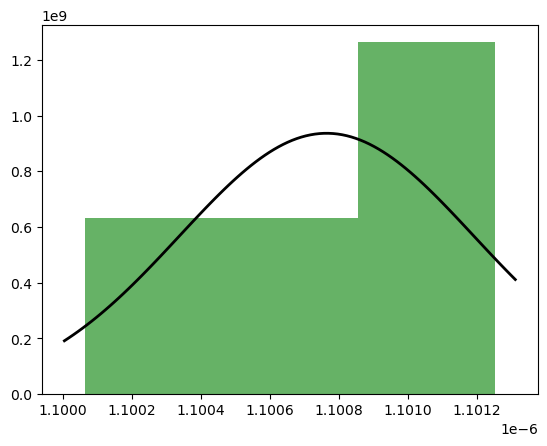

In [227]:
count, bins, ignored = plt.hist(residuals, bins=3, density=True, alpha=0.6, color='g')

# Fit a Gaussian distribution to the data
mu, std = norm.fit(residuals)

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Display
plt.show()

In [228]:
mu, std

(np.float64(1.1007639962889746e-06), np.float64(4.2610816739920804e-10))

In [229]:
### corrected table

calib_timebase_corr = {}
for dt in timebase:
    calib_timebase_corr[dt] = {}
    for a in amp:
        try:        
            fn = f"MUOLab/debug {dt}us cal 4 {a}.txt"
            df = pd.read_csv(fn, skiprows=3, delimiter="\t")
            data = df["Ch0_time2 (s)"] - df["Ch0_time1 (s)"]
            data = data - mu
            calib_timebase_corr[dt][a] = {}
            calib_timebase_corr[dt][a]["mu"] = np.mean(data)
            calib_timebase_corr[dt][a]["std"] = np.std(data)
            print(f"timebase={dt}, amp={a}, mu={np.mean(data) }, std={np.std(data)}")
        except KeyError as e:
            
            continue


timebase=1, amp=1, mu=9.993000037110253e-07, std=5.01900388523497e-10
timebase=1, amp=1.5, mu=1.0000310347669264e-06, std=1.5962612078718227e-09
timebase=1, amp=2, mu=1.0000577559768866e-06, std=1.6160854794833044e-09
timebase=20, amp=1.5, mu=2.0000190736221313e-05, std=1.7051146222325659e-09
timebase=20, amp=2, mu=2.0000236003711025e-05, std=1.7320508075686665e-09
timebase=30, amp=1, mu=2.999930873098376e-05, std=5.344341256984144e-10
timebase=30, amp=1.5, mu=3.0000388546083905e-05, std=1.8115781987652939e-09
timebase=30, amp=2, mu=3.0000487188545143e-05, std=1.854528470354762e-09


In [230]:
calib_timebase_corr

{1: {'1': {'mu': np.float64(9.993000037110253e-07),
   'std': 5.01900388523497e-10},
  '1.5': {'mu': np.float64(1.0000310347669264e-06),
   'std': 1.5962612078718227e-09},
  '2': {'mu': np.float64(1.0000577559768866e-06),
   'std': 1.6160854794833044e-09}},
 20: {'1.5': {'mu': np.float64(2.0000190736221313e-05),
   'std': 1.7051146222325659e-09},
  '2': {'mu': np.float64(2.0000236003711025e-05),
   'std': 1.7320508075686665e-09}},
 30: {'1': {'mu': np.float64(2.999930873098376e-05),
   'std': 5.344341256984144e-10},
  '1.5': {'mu': np.float64(3.0000388546083905e-05),
   'std': 1.8115781987652939e-09},
  '2': {'mu': np.float64(3.0000487188545143e-05),
   'std': 1.854528470354762e-09}}}

In [233]:
import numpy as np
# Start the LaTeX table
latex_code = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
latex_code += "dt (\\mu s) & A_{AB} (V) & \\mu & \\sigma \\\\ \\hline\n"

# Loop through the dictionary to add rows to the table
for key1, subdict in calib_timebase_corr.items():
    for key2, values in subdict.items():
        mu_rounded = f"{values['mu']:.2e}"  # Convert mu to scientific notation with 2 decimals
        sigma_rounded = f"{values['std']:.2e}"  # Convert sigma to scientific notation with 2 decimals
        latex_code += f"{key1} & {key2} & {mu_rounded} & {sigma_rounded} \\\\ \\hline\n"

# End the LaTeX table
latex_code += "\\end{tabular}\n\\caption{Nested Dictionary Data}\n\\end{table}"

# Print the LaTeX code
print(latex_code)


\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
dt (\mu s) & A_{AB} (V) & \mu & \sigma \\ \hline
1 & 1 & 9.99e-07 & 5.02e-10 \\ \hline
1 & 1.5 & 1.00e-06 & 1.60e-09 \\ \hline
1 & 2 & 1.00e-06 & 1.62e-09 \\ \hline
20 & 1.5 & 2.00e-05 & 1.71e-09 \\ \hline
20 & 2 & 2.00e-05 & 1.73e-09 \\ \hline
30 & 1 & 3.00e-05 & 5.34e-10 \\ \hline
30 & 1.5 & 3.00e-05 & 1.81e-09 \\ \hline
30 & 2 & 3.00e-05 & 1.85e-09 \\ \hline
\end{tabular}
\caption{Nested Dictionary Data}
\end{table}


In [234]:
### full data analysis

In [705]:
# fns = ["MUO_overnight_2.txt", "MUO_overnight_3.txt", "MUO_overnight_4.txt", "MUO_overnight.txt", "MUO_data.txt", "MUO_data_2.txt", "MUO_data_3.txt"]
fns = ["MUO_overnight_2.txt", "MUO_overnight_3.txt", "MUO_overnight_4.txt", "MUO_overnight.txt"]

df_master_list = []
for i in fns:
    fn = f"MUOLab/{i}"
    df_master_list.append(pd.read_csv(fn, skiprows=3, delimiter="\t"))

df = pd.concat(df_master_list)

In [706]:
df.columns

Index(['Ch0_time1 (s)', 'Ch0_amp1 (V)', 'Ch0_width1 (s)', 'Ch0_time2 (s)',
       'Ch0_amp2 (V)', 'Ch0_width2 (s)', 'Ch1_time1 (s)', 'Ch1_amp1 (V)',
       'Ch1_width1 (s)', 'Ch1_time2 (s)', 'Ch1_amp2 (V)', 'Ch1_width2 (s)'],
      dtype='object')

In [792]:
# Implement cuts
x1 = 0.5  # Top 75% for Ch0_amp1 (V)
x2 = 0.2  # Top 75% for (Ch0_time2 - Ch0_time1)
print(len(df))
# First cut: Top x1 percentile for Ch0_amp1 (V)
threshold1 = df["Ch0_amp1 (V)"].quantile(x1)
df_filtered = df[df["Ch0_amp1 (V)"] > threshold1]
print(len(df_filtered))
# Second cut: Top x2 percentile for (Ch0_time2 - Ch0_time1)
time_diff = df_filtered["Ch0_time2 (s)"] - df_filtered["Ch0_time1 (s)"]
threshold2 = time_diff.quantile(1 - x2)
df_filtered = df_filtered[time_diff > threshold2]
print(len(df_filtered))

493134
246566
49305


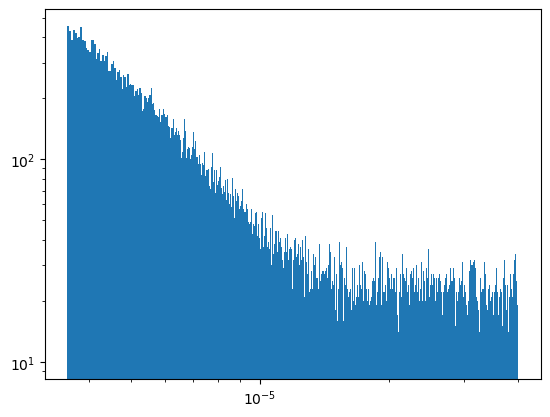

In [793]:
_ = plt.hist(df_filtered["Ch0_time2 (s)"] - df_filtered["Ch0_time1 (s)"], 1000);
plt.yscale("log")
plt.xscale("log")

Text(0, 0.5, 'Counts')

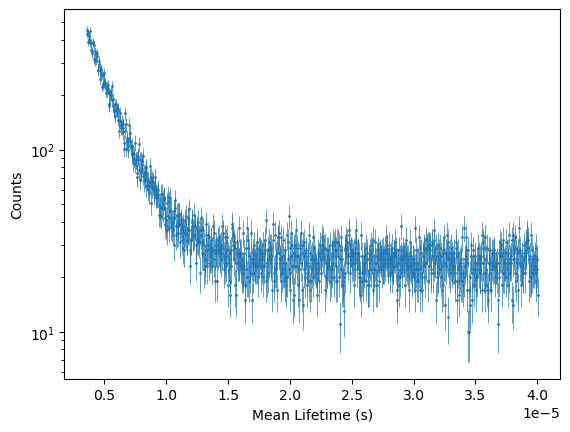

In [810]:
counts, bins, __ = _
binc = (bins[1:] + bins[:-1])/2
plt.scatter(binc, counts, s=1)
plt.errorbar(binc, counts, np.sqrt(counts), linestyle="", linewidth=0.5)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mean Lifetime (s)")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

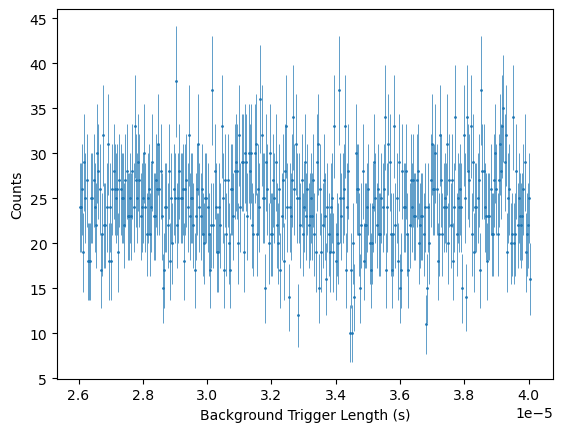

In [811]:
# Identify and remove background
bkg_binc = binc[np.where(binc > 2.6e-5)]
bkg_counts = counts[np.where(binc > 2.6e-5)]
plt.scatter(bkg_binc, bkg_counts, s=1)
plt.errorbar(bkg_binc, bkg_counts, np.sqrt(bkg_counts), linestyle="", linewidth=0.5)
plt.xlabel("Background Trigger Length (s)")
plt.ylabel("Counts")

In [812]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, bkg_binc, bkg_counts, sigma=np.sqrt(bkg_counts))
perr = np.sqrt(np.diag(pcov))

Text(0, 0.5, 'Counts')

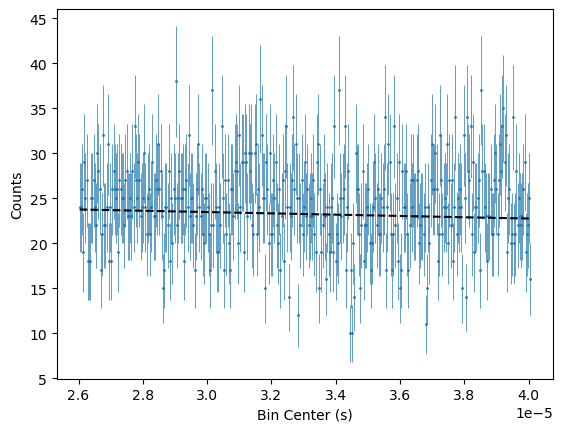

In [813]:
plt.scatter(bkg_binc, bkg_counts, label='Data', s=1)
plt.errorbar(bkg_binc, bkg_counts, np.sqrt(bkg_counts), linestyle="", linewidth=0.5)
plt.plot(bkg_binc, linear(bkg_binc, *popt), 'k--', label='Best Fit Line')
plt.xlabel("Bin Center (s)")
plt.ylabel("Counts")

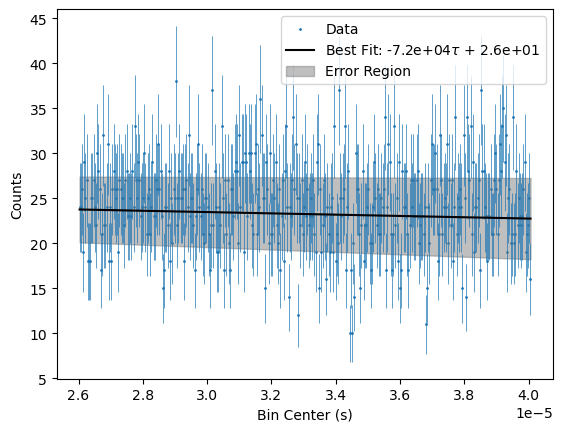

In [814]:
a_fit, b_fit = popt
a_err, b_err = perr

a_fit_sci = f"{a_fit:.1e}"
b_fit_sci = f"{b_fit:.1e}"
a_err_sci = f"{round(a_err/a_fit, 2)}"
b_err_sci = f"{b_err/b_fit:}"

# Create the label for the legend
fit_label = fr'Best Fit: {a_fit_sci}$\tau$ + {b_fit_sci}'

# Plotting
plt.scatter(bkg_binc, bkg_counts, label='Data', s=1)
plt.errorbar(bkg_binc, bkg_counts, np.sqrt(bkg_counts), linestyle="", linewidth=0.5)

# Display best fit line and parameters in the legend
plt.plot(bkg_binc, linear(bkg_binc, *popt), 'k', label=fit_label)

upper_line = linear(bkg_binc, a_fit + a_err, b_fit + b_err)
lower_line = linear(bkg_binc, a_fit - a_err, b_fit - b_err)
plt.fill_between(bkg_binc, upper_line, lower_line, color='gray', alpha=0.5, label='Error Region')


# Labeling
plt.xlabel("Bin Center (s)")
plt.ylabel("Counts")
plt.legend()

# Show plot
plt.show()

In [815]:
mbkg, bbkg = popt
mbkgerr, bbkgerr = perr

In [816]:
mbkg, bbkg, mbkgerr, bbkgerr, mbkg/mbkgerr

(np.float64(-72048.74573356648),
 np.float64(25.647039407210116),
 np.float64(61456.43560916629),
 np.float64(2.0487376872683276),
 np.float64(-1.172354774880897))

In [817]:
binc_corr.shape, counts_corr.shape

((171,), (171,))

Text(0, 0.5, 'Counts')

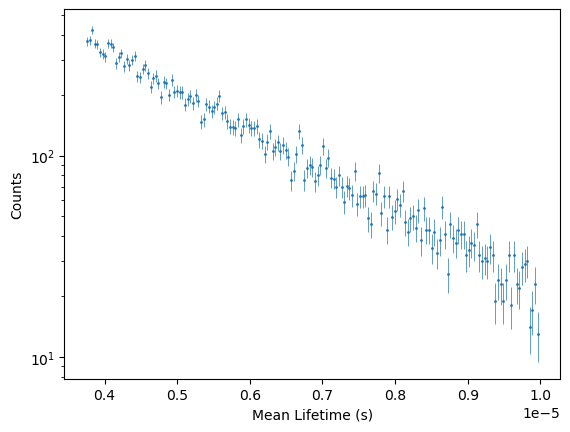

In [818]:
# Correcting muon graph
counts_corr = counts - linear(binc, *popt)
binc_corr = binc

timecut = 1e-5
counts_corr = counts_corr[np.where(binc<timecut)]
binc_corr = binc_corr[np.where(binc<timecut)]

counts_corr = counts_corr[5:]
binc_corr = binc_corr[5:]

plt.scatter(binc_corr, counts_corr, s=1)
plt.errorbar(binc_corr, counts_corr, np.sqrt(counts_corr), linestyle="", linewidth=0.5)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mean Lifetime (s)")
plt.ylabel("Counts")

In [819]:
# Performing best fit

def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, binc_corr, np.log(counts_corr), sigma=np.sqrt(counts_corr)/counts_corr)
perr = np.sqrt(np.diag(pcov))

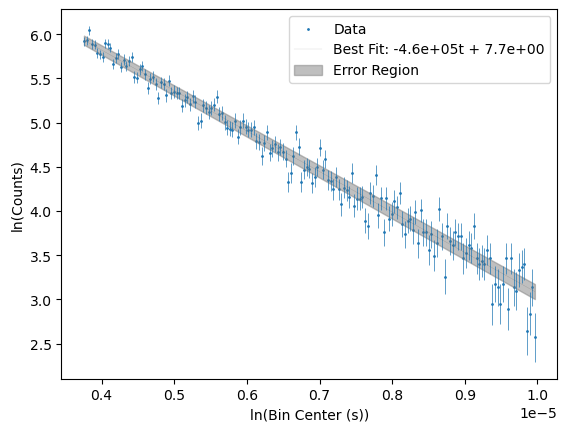

In [820]:
a_fit, b_fit = popt
a_err, b_err = perr

a_fit_sci = f"{a_fit:.1e}"
b_fit_sci = f"{b_fit:.1e}"
a_err_sci = f"{round(a_err/a_fit, 2)}"
b_err_sci = f"{b_err/b_fit:}"

# Create the label for the legend
fit_label = fr'Best Fit: {a_fit_sci}t + {b_fit_sci}'

# Plotting
plt.scatter(binc_corr, np.log(counts_corr), label='Data', s=1)
plt.errorbar(binc_corr, np.log(counts_corr), np.sqrt(counts_corr)/counts_corr, linestyle="", linewidth=0.5)

# # Display best fit line and parameters in the legend
plt.plot(binc_corr, linear(binc_corr, *popt), 'k', label=fit_label, linewidth=0.05)

upper_line = linear(binc_corr, a_fit + a_err, b_fit + b_err)
lower_line = linear(binc_corr, a_fit - a_err, b_fit - b_err)
plt.fill_between(binc_corr, upper_line, lower_line, color='gray', alpha=0.5, label='Error Region')


# Labeling
plt.xlabel("ln(Bin Center (s))")
plt.ylabel("ln(Counts)")
plt.legend()

# Show plot
plt.show()

In [821]:
tau = abs(1/a_fit)
tau_err = a_err/a_fit**2
tau, tau_err

(np.float64(2.1841415570788633e-06), np.float64(2.5844962072945953e-08))

In [745]:
a_err/a_fit**2 * 1e6

np.float64(0.04823193114016631)

In [610]:
### Monte Carlo Sim

In [611]:
tau=1/abs(a_fit)

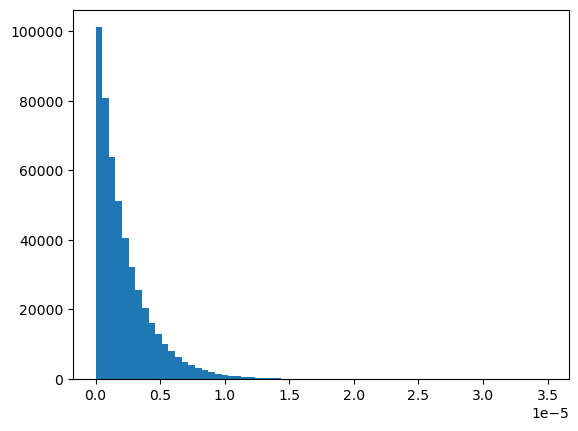

In [618]:
#len(pd.concat(df_master_list))
ri = np.random.uniform(0, 1, len(pd.concat(df_master_list)))
ti = -tau * np.log(ri)
dNk = 5e-6/10
Nk = np.linspace(min(ti), max(ti), int((max(ti) - min(ti))/dNk))
_ = plt.hist(ti, bins=Nk);

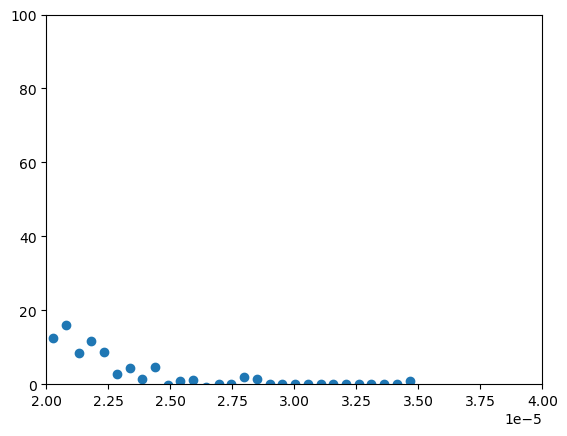

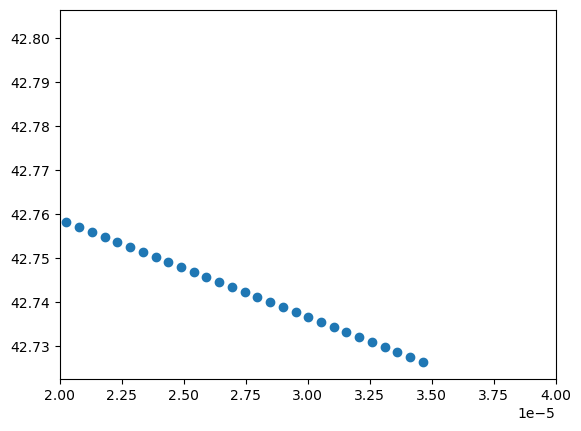

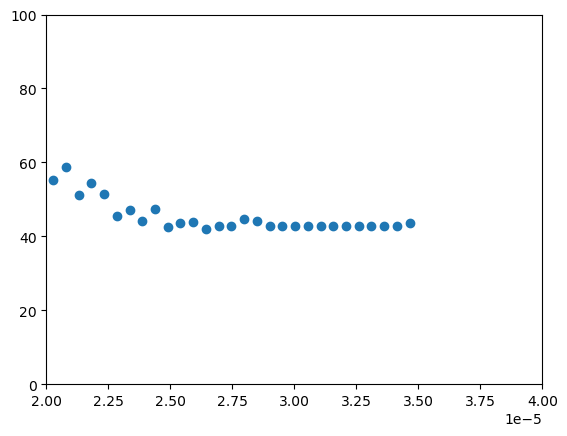

In [635]:
counts_mc, bins_mc, __ = _
bin_edges = bins_mc
binc_mc = (bins_mc[:-1] + bins_mc[1:])/2
counts_mc = counts_mc + np.random.normal(0, np.sqrt(counts_mc))
plt.scatter(binc_mc, counts_mc)
plt.xlim(2e-5, 4e-5)
plt.ylim(0, 100)
plt.show()
#counts_mc = counts_mc + np.random.normal(mbkg, mbkgerr) * binc_mc + np.random.normal(bbkg, bbkgerr)
counts_mc = counts_mc + mbkg * binc_mc + bbkg

# plt.scatter(binc_mc, counts_mc)
plt.scatter(binc_mc, mbkg * binc_mc + bbkg)
plt.xlim(2e-5, 4e-5)
plt.show()

plt.scatter(binc_mc, counts_mc)
plt.xlim(2e-5, 4e-5)
plt.ylim(0, 100)
plt.show()

In [628]:
# counts_mc = np.random.normal(mbkg, mbkgerr) * binc_mc + np.random.normal(bbkg, bbkgerr)
# counts_mc = mbkg * binc_mc + bbkg

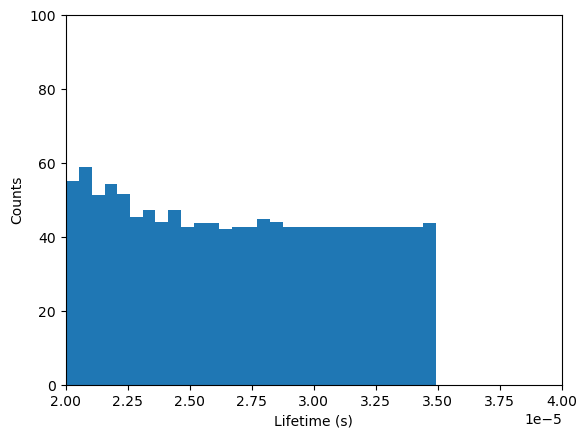

In [636]:
plt.hist(bin_edges[:-1], bin_edges, weights=counts_mc);
# plt.yscale("log")
plt.xlabel("Lifetime (s)")
plt.ylabel("Counts")
# plt.scatter(binc_mc, counts_mc)
plt.xlim(2e-5, 4e-5)
plt.ylim(0, 100)
plt.show()

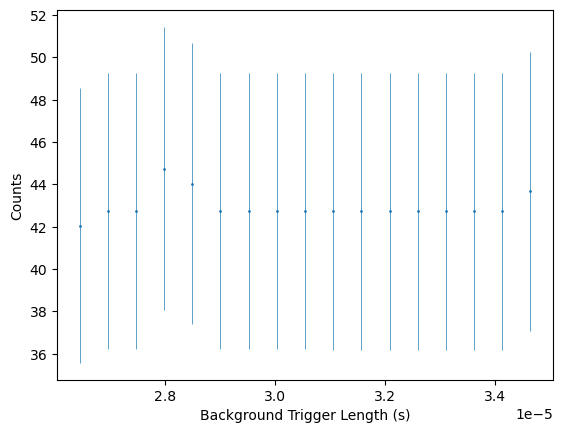

In [637]:
# Repeat analysis
# Identify and remove background
bkg_binc = binc_mc[np.where(binc_mc > 2.6e-5)]
bkg_counts = counts_mc[np.where(binc_mc > 2.6e-5)]
plt.scatter(bkg_binc, bkg_counts, s=1)
plt.errorbar(bkg_binc, bkg_counts, np.sqrt(bkg_counts), linestyle="", linewidth=0.5)
plt.xlabel("Background Trigger Length (s)")
plt.ylabel("Counts")
plt.show()



In [638]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, bkg_binc, bkg_counts, sigma=np.sqrt(bkg_counts))
perr = np.sqrt(np.diag(pcov))

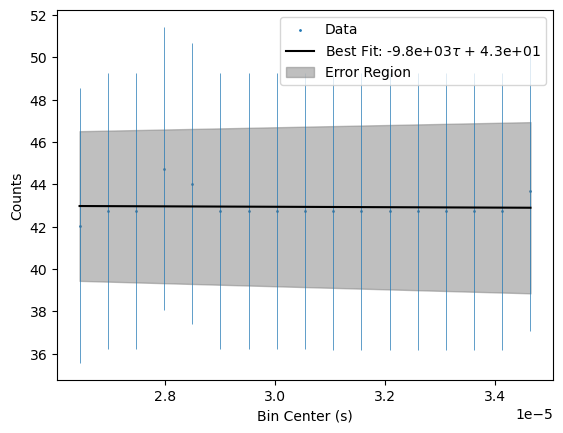

In [639]:
a_fit, b_fit = popt
a_err, b_err = perr

a_fit_sci = f"{a_fit:.1e}"
b_fit_sci = f"{b_fit:.1e}"
a_err_sci = f"{round(a_err/a_fit, 2)}"
b_err_sci = f"{b_err/b_fit:}"

# Create the label for the legend
fit_label = fr'Best Fit: {a_fit_sci}$\tau$ + {b_fit_sci}'

# Plotting
plt.scatter(bkg_binc, bkg_counts, label='Data', s=1)
plt.errorbar(bkg_binc, bkg_counts, np.sqrt(bkg_counts), linestyle="", linewidth=0.5)

# Display best fit line and parameters in the legend
plt.plot(bkg_binc, linear(bkg_binc, *popt), 'k', label=fit_label)

upper_line = linear(bkg_binc, a_fit + a_err, b_fit + b_err)
lower_line = linear(bkg_binc, a_fit - a_err, b_fit - b_err)
plt.fill_between(bkg_binc, upper_line, lower_line, color='gray', alpha=0.5, label='Error Region')


# Labeling
plt.xlabel("Bin Center (s)")
plt.ylabel("Counts")
plt.legend()

# Show plot
plt.show()

In [645]:
### Remove line of best fit

Text(0, 0.5, 'Counts')

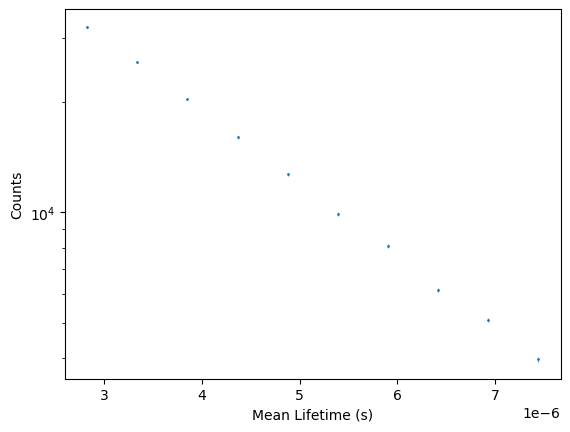

In [647]:
counts_mc_corr = counts_mc - linear(binc_mc, *popt)
binc_mc_corr = binc_mc

counts_mc_corr = counts_mc_corr[np.where(binc_mc<0.75e-5)]
binc_mc_corr = binc_mc[np.where(binc_mc<0.75e-5)]

counts_mc_corr = counts_mc_corr[5:]
binc_mc_corr = binc_mc_corr[5:]

plt.scatter(binc_mc_corr, counts_mc_corr, s=1)
plt.errorbar(binc_mc_corr, counts_mc_corr, np.sqrt(counts_mc_corr), linestyle="", linewidth=0.5)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mean Lifetime (s)")
plt.ylabel("Counts")

In [648]:
# Performing best fit

def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, binc_mc_corr, np.log(counts_mc_corr), sigma=np.sqrt(counts_mc_corr)/counts_mc_corr)
perr = np.sqrt(np.diag(pcov))

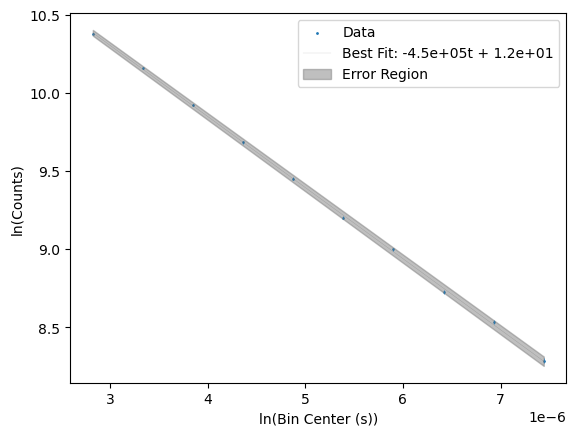

In [650]:
a_fit, b_fit = popt
a_err, b_err = perr

a_fit_sci = f"{a_fit:.1e}"
b_fit_sci = f"{b_fit:.1e}"
a_err_sci = f"{round(a_err/a_fit, 2)}"
b_err_sci = f"{b_err/b_fit:}"

# Create the label for the legend
fit_label = fr'Best Fit: {a_fit_sci}t + {b_fit_sci}'

# Plotting
plt.scatter(binc_mc_corr, np.log(counts_mc_corr), label='Data', s=1)
plt.errorbar(binc_mc_corr, np.log(counts_mc_corr), np.sqrt(counts_mc_corr)/counts_mc_corr, linestyle="", linewidth=0.5)

# # Display best fit line and parameters in the legend
plt.plot(binc_mc_corr, linear(binc_mc_corr, *popt), 'k', label=fit_label, linewidth=0.05)

upper_line = linear(binc_mc_corr, a_fit + a_err, b_fit + b_err)
lower_line = linear(binc_mc_corr, a_fit - a_err, b_fit - b_err)
plt.fill_between(binc_mc_corr, upper_line, lower_line, color='gray', alpha=0.5, label='Error Region')


# Labeling
plt.xlabel("ln(Bin Center (s))")
plt.ylabel("ln(Counts)")
plt.legend()

# Show plot
plt.show()

In [672]:
1/a_fit

np.float64(-2.198661520530805e-06)

In [671]:
accepted_tau = 2196980.3e-12
accepted_tau_err = 2.2e-12

accepted_tau

2.1969803e-06

In [688]:
import numpy as np
import scipy.stats as stats

# Given accepted values
accepted_tau = 2196980.3e-12  # s
accepted_tau_err = 2.2e-12  # s

# Replace these with your measured values

# Compute total uncertainty
sigma = np.sqrt(tau_err**2 + accepted_tau_err**2)

# Compute number of sigma deviations
num_sigma = abs(tau - accepted_tau) / sigma
print(f"Measurement is {num_sigma:.2f} sigma away from the accepted value.")

# Conduct a t-test (one-sample test against the accepted value)
t_statistic = (tau - accepted_tau) / sigma

# Get two-tailed p-value for the t-test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=1e6))  # Large df approximates normality

print(f"T-test statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3g}")

# Interpretation
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Statistically significant difference (reject null hypothesis).")
else:
    print("No significant difference (fail to reject null hypothesis).")


Measurement is 105.31 sigma away from the accepted value.
T-test statistic: -105.31
P-value: 0
Statistically significant difference (reject null hypothesis).


In [689]:
accepted_tau/tau

np.float64(-0.985899382254538)

In [690]:
abs(tau - accepted_tau)

np.float64(4.425382446855983e-06)

In [691]:
sigma

np.float64(4.20215888417002e-08)